In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("Fully Cleant.csv")

In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
model=KNeighborsClassifier(n_neighbors=2)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=data.drop("Purchased",axis=1)
y=data['Purchased']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [14]:
pred=model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[75  5]
 [35 17]]
              precision    recall  f1-score   support

           0       0.68      0.94      0.79        80
           1       0.77      0.33      0.46        52

    accuracy                           0.70       132
   macro avg       0.73      0.63      0.62       132
weighted avg       0.72      0.70      0.66       132



In [18]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
    

Text(0, 0.5, 'Error Rate')

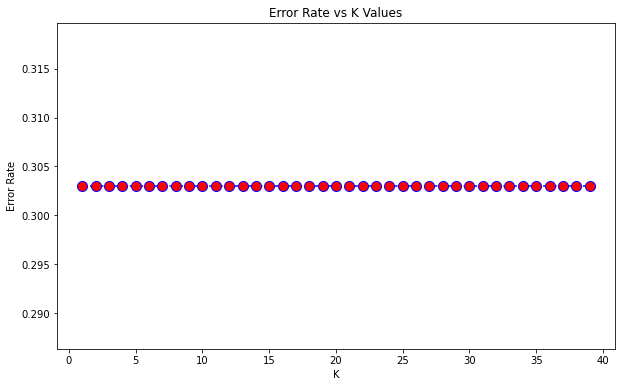

In [21]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue",ls="--",marker="o",
         markerfacecolor="red",markersize=10)
plt.title("Error Rate vs K Values")
plt.xlabel("K")
plt.ylabel("Error Rate")